<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/py_fourier_descriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

輪郭形状のフーリエ級数展開と再構成

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import io
from skimage import measure
import cv2
from google.colab import files

Saving botol_T.jpg to botol_T.jpg


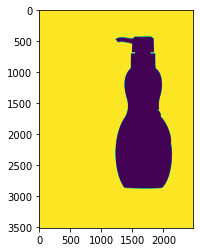

In [ ]:
# 画像の読み込み
uploaded = files.upload()
uploaded_file_name = next(iter(uploaded))
im = cv2.imread(uploaded_file_name)
src = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(src)

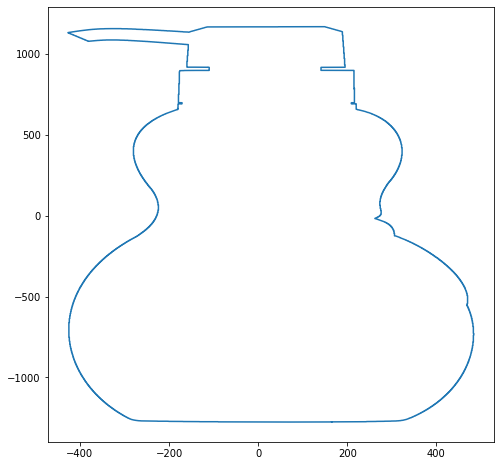

In [ ]:
def find_largest_contour(image):
    contours = measure.find_contours(image)
    contour_sizes = [len(c) for c in contours]
    results = contours[np.argmax(contour_sizes)]
    return results

contour = find_largest_contour(src)

# 重心を原点に平行移動
zs = contour[:, 1] + (-contour[:, 0]) * 1j
zs -= np.mean(zs)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(zs.real, zs.imag)
plt.show();

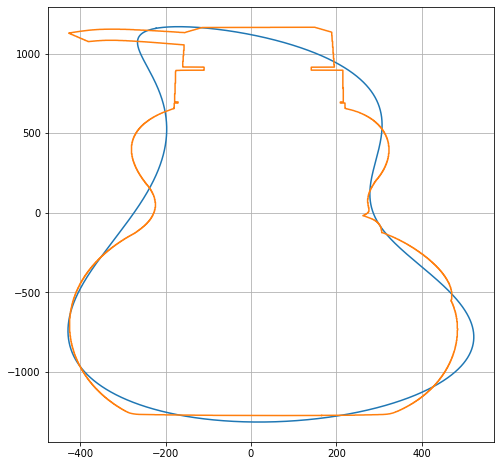

In [ ]:
# arrayのインデックス変換・規格化
sp = np.fft.fftshift(np.fft.fft(zs)) / len(zs)

# K次まで計算する
K = 4
center_sp = len(sp) // 2
cs = sp[center_sp-K:center_sp+K+1]

# フーリエ級数を計算
ts = np.linspace(0.0, 2.0 * np.pi, len(zs)) - np.pi
fs = []
for t in ts:
   temp = np.array([cs[i] * np.exp(1j * k * t)
       for i, k in enumerate(range(-K, K+1))])
   fs.append(temp.sum())
fs = np.array(fs)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fs.real, fs.imag)
ax.plot(zs.real, zs.imag)
ax.grid()
plt.show();
